In [2]:
import numpy as np
import matplotlib.pyplot as plt
from FADS.input import get_dset
from cv2 import imread

In [20]:
import glob
from pathlib import Path

pic_dirs = glob.glob("/home/shussain/FADS/experiments/laplacian_eigenmap/003_data/*/*.jpeg")
imgs = []
moves = []
for pic_dir in pic_dirs:
    label = Path(pic_dir).parts[7]#{"Rock": 0, "Paper": 1, "Scissors": 2}[Path(pic_dir).parts[7]]
    moves.append(label)
    img = imread(pic_dir, 0)
    imgs.append(img.ravel())

In [4]:
len(pic_dirs)

1500

In [5]:
from sklearn.preprocessing import normalize, StandardScaler
scale = StandardScaler()
imgs = scale.fit_transform(np.array(imgs))
moves = np.array(moves)

In [6]:
imgs.shape

(1500, 40000)

(array([6.047790e+05, 5.862944e+07, 7.047960e+05, 4.130800e+04,
        1.155200e+04, 3.656000e+03, 1.537000e+03, 1.249000e+03,
        2.230000e+02, 1.460000e+03]),
 array([-6.5088755 , -1.98629582,  2.53628387,  7.05886356, 11.58144324,
        16.10402293, 20.62660262, 25.1491823 , 29.67176199, 34.19434168,
        38.71692137]),
 <BarContainer object of 10 artists>)

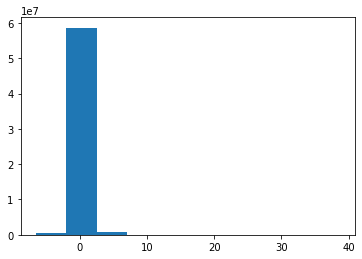

In [7]:
plt.hist(imgs.ravel())

In [9]:
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA

lap_eig_knn = SpectralEmbedding(3)
#lap_eig_rbf = SpectralEmbedding(affinity='rbf')
pca = PCA(3)
kpca = KernelPCA(3, kernel='rbf')

X_knn = lap_eig_knn.fit_transform(imgs)
X_rbf = lap_eig_rbf.fit_transform(imgs)
X_pca = pca.fit_transform(imgs)
X_kpca = kpca.fit_transform(imgs)

In [10]:
label = ["Rock", "Paper", "Scissors"]
title = ["LE W=nearest neighbors", "LE W=Heat kernel", "PCA", "KPCA"]

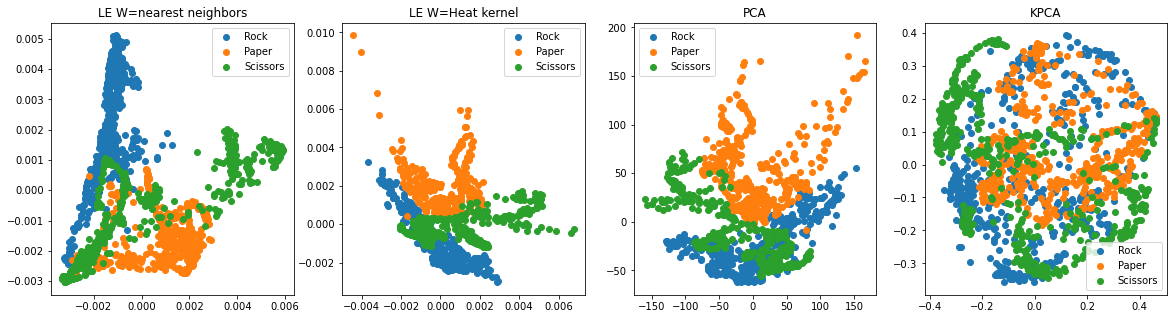

In [11]:
label = ["Rock", "Paper", "Scissors"]
title = ["LE W=nearest neighbors", "LE W=Heat kernel", "PCA", "KPCA"]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for j, reduced in enumerate([X_knn, X_rbf, X_pca, X_kpca]):
    plt.sca(axes[j])
    for i in range(3):
        plt.scatter(reduced[moves == i, 0], reduced[moves == i, 1], label=label[i])
    plt.legend()
    plt.title(title[j])

plt.savefig("dim_red_hands.jpeg")

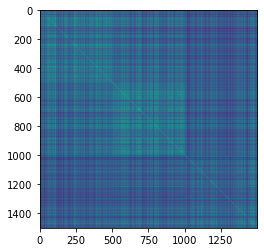

In [41]:
plt.imshow(lap_eig_rbf.affinity_matrix_)

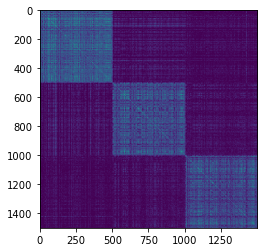

In [42]:
plt.imshow(lap_eig_knn.affinity_matrix_.toarray())

In [14]:
import pandas as pd

In [11]:
import networkx as nx

In [19]:
label

['Rock', 'Paper', 'Scissors']

In [21]:
df_knn = {
    "X": X_knn[:, 0],
    "Y": X_knn[:, 1],
    "Z": X_knn[:, 2],
    "move": moves,
    "dir": di
}

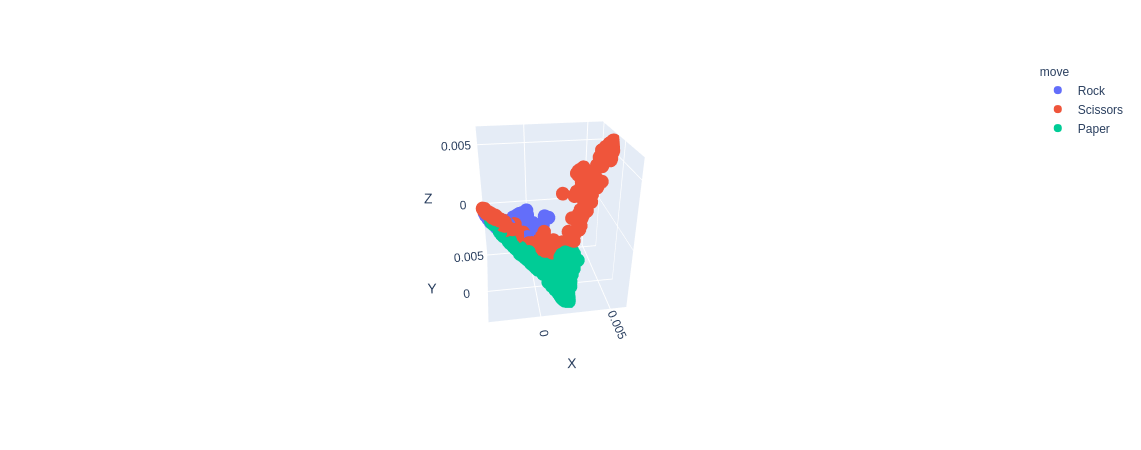

In [22]:
import plotly.express as px
fig = px.scatter_3d(df_knn, x='X', y='Y', z='Z',
              color='move')
fig.show()

In [43]:
G = nx.from_numpy_matrix(lap_eig_knn.affinity_matrix_.toarray())
G

In [28]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

In [51]:

for edge in G.edges():
    G.nodes[edge[0]]['pos'] = X_knn[edge[0], :]
    G.nodes[edge[1]]['pos'] = X_knn[edge[0], :]

In [53]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [54]:
import plotly.graph_objects as go

In [14]:
fig = go.Figure()
fig.show()

NameError: name 'edge_trace' is not defined

In [16]:
nx.random_geometric_graph(200, 0.125)


In [23]:
from pathlib import Path
from glob import glob
from os import rename
import re

haps = sorted(glob("/home/shussain/hapgen2/1000GP_Phase3/data/*.hap"))
legends = sorted(glob("/home/shussain/hapgen2/1000GP_Phase3//data/*.legend"))
legends

['/home/shussain/hapgen2/1000GP_Phase3//data/1000GP_Phase3_chr22.legend']

In [24]:
for hap, leg in zip(haps, legends):
    chrr = re.findall("chr\d+", leg)[0]
    
    print(f"/home/shussain/hapgen2/CEU_impute/data/{chrr}.haps")
    rename(hap, f"/home/shussain/hapgen2/1000GP_Phase3/data/{chrr}.haps")
    rename(leg, f"/home/shussain/hapgen2/1000GP_Phase3/data/{chrr}.legend")    

/home/shussain/hapgen2/CEU_impute/data/chr22.haps


In [12]:
re.findall("chr\d+", hap)

['chr9']